# Compare the reduced spectra with HI4PI
#### 12/8/21 jpw

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os, glob
import math
from astropy.io import fits
%matplotlib inline

In [ ]:
path = '/Users/jpw/G/21cm_telescope/HI4PI/'
os.chdir(path)
f = glob.glob('spectrum*.txt')
nf = len(f)
lon = np.asarray([int(f[i][12:].split('.')[0]) for i in range(nf)])
isort = np.argsort(lon)

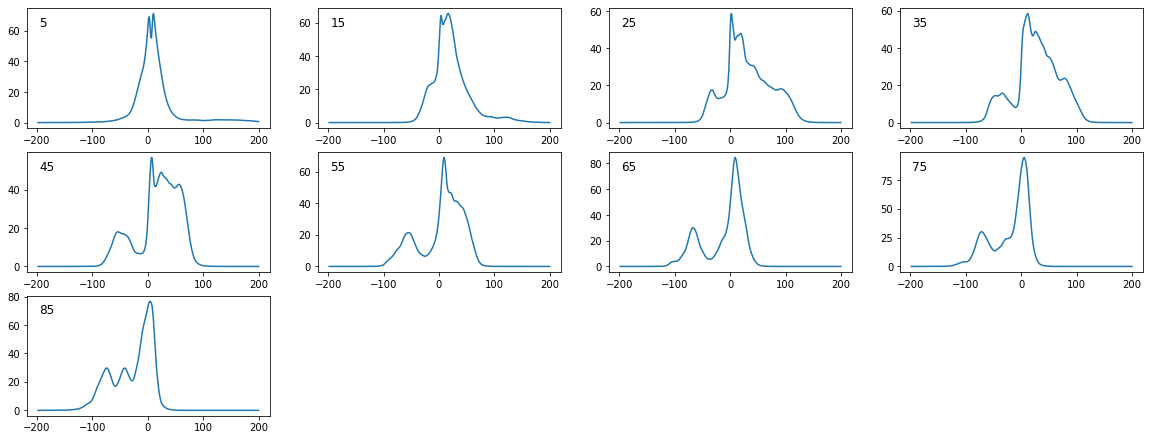

In [ ]:
# plot the HI4PI spectra in order of increasing longitude

nx = 4
ny = math.ceil(nf/nx)
sx = 20
sy = 0.5 * sx * ny / nx
fig = plt.figure(figsize=(sx,sy))
for i in range(nf):
    j = isort[i]
    ax = fig.add_subplot(ny, nx, i+1)
    v, T = np.loadtxt(f[j], unpack=True)
    ax.plot(v, T)
    ax.text(0.05, 0.85, str(lon[j]), fontsize=12, transform=ax.transAxes)

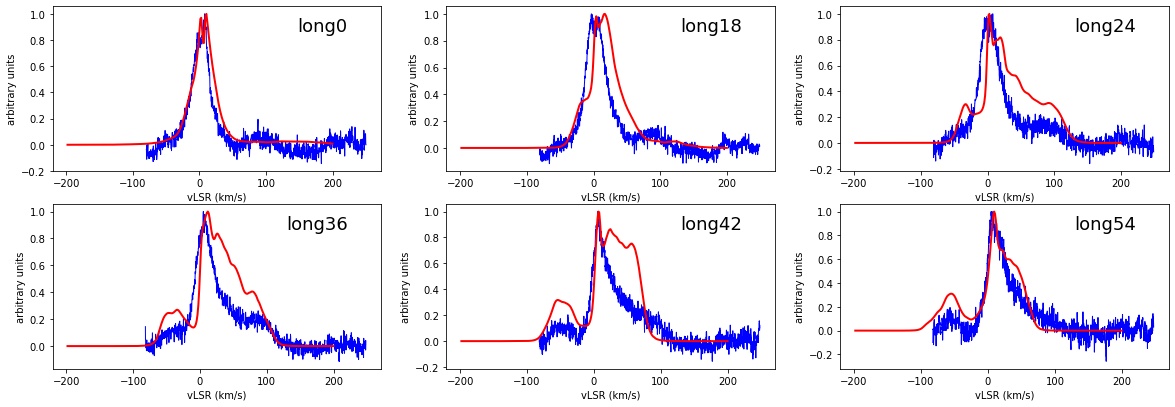

In [ ]:
# overplot the team2 data (by hand as its nearest neighbor and a rough comparison at this point)

rpath = '/Users/jpw/G/21cm_telescope/data_team2/2021_12_01/reduced/'
fr =    ['long0', 'long18', 'long24', 'long36', 'long42', 'long54']
fcomp = ['lon5',  'lon15',  'lon25',  'lon35',  'lon45',  'lon55']

nx = 3
ny = math.ceil(len(fr)/nx)
sx = 20
sy = 0.5 * sx * ny / nx
fig = plt.figure(figsize=(sx,sy))
for i, f in enumerate(fr):
    ax = fig.add_subplot(ny, nx, i+1)
    v, C = np.genfromtxt(rpath+f+'_reduced.csv', delimiter=',', unpack=True)
    vHI, THI = np.loadtxt('spectrum_'+fcomp[i]+'.txt', unpack=True)
    ax.plot(v, C/C.max(), 'b-', lw=1)
    ax.plot(vHI, THI/THI.max(), 'r-', lw=2)
    ax.set_xlabel('vLSR (km/s)')
    ax.set_ylabel('arbitrary units')
    ax.text(0.9, 0.85, f, fontsize=18, ha='right', transform=ax.transAxes)

plt.savefig(rpath+'team2_HI4PI_comparison.png')